In [2]:
# Copyright (c) 2018 Rui Shu
import argparse
import numpy as np
import torch
import tqdm
from codebase import utils as ut
from codebase.models.gmvae import GMVAE
from codebase import utils as ut
from codebase.models.vae import VAE
import matplotlib.pyplot as plt
from codebase.models.fsvae import FSVAE

def tile_img(samples):
    idxs = [(i, j) for i in range(1, 11) for j in range(20)]
    sampled = {}
    for i, idx in enumerate(idxs):
        sampled[idx] = samples[i, :].reshape(28, 28).cpu().detach().numpy()
    
    all_images = []
    for i in range(1, 11):
        cols = []
        for j in range(20):
            cols.append(sampled[(i, j)])
        col_arr = np.hstack(cols)
        all_images.append(col_arr)
    img_arr = np.vstack(all_images)
    return img_arr

VAE Images

In [ ]:
layout = [
    ('model={:s}',  'vae'),
    ('z={:02d}',  10),
    ('run={:04d}', 0)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
print('Model name:', model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
vae = VAE(z_dim=10, name=model_name).to(device)

ut.load_model_by_name(vae, global_step=20000, device=device)
samples = vae.sample_x(200)
vae_img = tile_img(samples)
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(vae_img, cmap = 'gray')
plt.savefig('./imgtiles/vae_tile.jpg')
plt.show()

GMVAE Images

In [ ]:
layout = [
    ('model={:s}',  'gmvae'),
    ('z={:02d}',  10),
    ('k={:03d}',  500),
    ('run={:04d}', 0)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
print('Model name:', model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
gmvae = GMVAE(z_dim= 10, k= 500, name=model_name).to(device)

ut.load_model_by_name(gmvae, global_step=20000, device=device)
samples = gmvae.sample_x(200)
vae_img = tile_img(samples)
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(vae_img, cmap = 'gray')
plt.savefig('./imgtiles/gmvae_tile.jpg')
plt.show()


In [9]:
layout = [
    ('model={:s}',  'fsvae'),
    ('run={:04d}', 0)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
print('Model name:', model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
fsvae = FSVAE(name=model_name).to(device)

ut.load_model_by_name(fsvae, global_step=20000, device=device)
all_images = []

Model name: model=fsvae_run=0000
Loaded from checkpoints/model=fsvae_run=0000/model-20000.pt


In [141]:
samples = fsvae.sample_z(20)
imgs = {}
for i in range(10):
    for j in range(20):
        z = samples[j, :].reshape(1,-1)
        y = torch.zeros_like(z).reshape(1,-1).cuda()
        y[0,i] = float(1.0)
        img = fsvae.compute_mean_given(z, y)
        imgs[(i,j)] = img.reshape(3, 32, 32).permute(1, 2, 0).cpu().detach().numpy()

In [142]:
all_images = []
for i in range(10):
    cols = []
    for j in range(20):
        cols.append(imgs[(i, j)])
    col_arr = np.hstack(cols)
    all_images.append(col_arr)
img_arr = np.vstack(all_images)

In [143]:
samples.size()
        

torch.Size([20, 10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


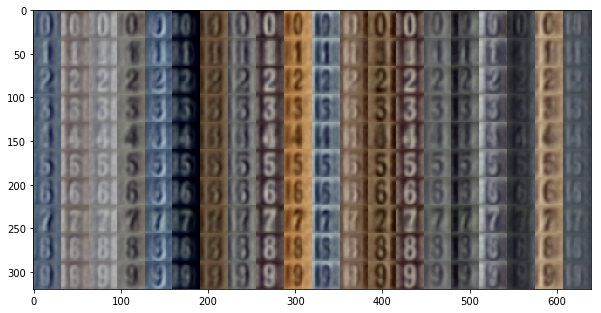

In [145]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img_arr)
plt.savefig('./imgtiles/fsvae.jpg')
plt.show()       

3072

In [ ]:
print(samples.size())
print(y.size())

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('./imgtiles/fsvae.png')

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img, 'gray')
plt.show()


In [ ]:
noise = 0.01 * np.random.normal(size = img.shape)

In [ ]:
img_new = img + noise

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img_new[:,:,0], 'gray')
# plt.savefig('./imgtiles/fsvae_samples.jpg')
plt.show()
